In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farrrhann","key":"d3061dac6d88339196d42856dee0b5fa"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# import data dari kaggle
!kaggle datasets download -d anbumalar1991/fight-dataset

100% 1.79G/1.80G [00:18<00:00, 133MB/s]
100% 1.80G/1.80G [00:18<00:00, 103MB/s]


In [ ]:
import zipfile,os

In [ ]:
# ekstrak dataset
local_zip = '/content/fight-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/actions (2)/actions/train'

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
# membagi data training dan data testing
splitfolders.ratio(base_dir, output=base_dir, ratio=(0.8,0.2))

Copying files: 68048 files [00:21, 3144.65 files/s]


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir(train_dir)

['stand', 'ride_horse', 'kick', 'wave', 'shoot_gun', 'push', 'hit', 'punch']

In [ ]:
# membuat direktori label pada direktori data training
train_kick_dir = os.path.join(train_dir, 'kick')
train_stand_dir = os.path.join(train_dir, 'stand')
train_wave_dir = os.path.join(train_dir, 'wave')
train_ride_horse_dir = os.path.join(train_dir, 'ride_horse')
train_shoot_gun_dir = os.path.join(train_dir, 'shoot_gun')
train_push_dir = os.path.join(train_dir, 'push')
train_punch_dir = os.path.join(train_dir, 'punch')
train_hit_dir = os.path.join(train_dir, 'hit')

In [ ]:
# membuat direktori label pada direktori data validasi
validation_kick_dir = os.path.join(validation_dir, 'kick')
validation_stand_dir = os.path.join(validation_dir, 'stand')
validation_wave_dir = os.path.join(validation_dir, 'wave')
validation_ride_horse_dir = os.path.join(validation_dir, 'ride_horse')
validation_shoot_gun_dir = os.path.join(validation_dir, 'shoot_gun')
validation_push_dir = os.path.join(validation_dir, 'push')
validation_punch_dir = os.path.join(validation_dir, 'punch')
validation_hit_dir = os.path.join(validation_dir, 'hit')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
                    )

In [ ]:
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
                    )

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    color_mode = "rgb",
    batch_size= 128,
    shuffle = True,
    class_mode='categorical'
)

Found 54437 images belonging to 8 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        color_mode = "rgb",
        batch_size=128,
        shuffle = False,
        class_mode='categorical'
        )

Found 13611 images belonging to 8 classes.


In [ ]:
# pemodelan sequential dengan menerapkan Conv2D Maxpooling Layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' dengan learning rate 0.00146
Adam(learning_rate=0.00146, name='Adam')
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
            print("\nReached 92% accuracy") 
            self.model.stop_training = True 
     
callbacks = myCallback()

In [28]:
history = model.fit(
      train_generator,
      steps_per_epoch=425,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=106,
      verbose=2,
      callbacks=[callbacks]
      )

Epoch 1/100
425/425 - 2646s - loss: 0.8579 - accuracy: 0.7140 - val_loss: 0.3509 - val_accuracy: 0.8871
Epoch 2/100
425/425 - 2636s - loss: 0.2431 - accuracy: 0.9240 - val_loss: 0.1165 - val_accuracy: 0.9665

Reached 92% accuracy


In [29]:
import matplotlib.pyplot as plt

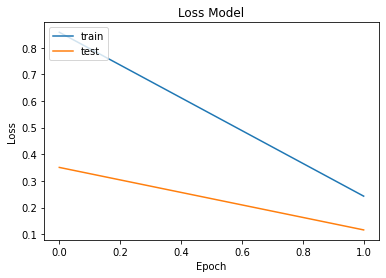

In [30]:
# membuat plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

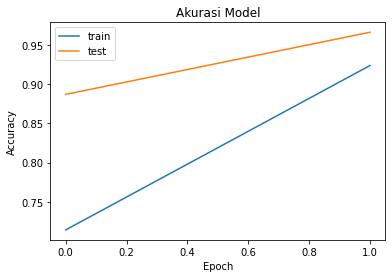

In [31]:
# membuat plot akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
import warnings

In [34]:
# menghilangkan warning
warnings.filterwarnings('ignore')

In [36]:
# convert model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp647jodtb/assets


In [37]:
# save model
with open('RPS_model.tflite', 'wb') as f:
  f.write(tflite_model)